# FeatureSelector 的使用  
[参考链接](https://mp.weixin.qq.com/s?__biz=MzI5MTIyMTY5MQ==&mid=2247486028&idx=4&sn=b0e1de86ead1e957a1e2c1f0819233b6&chksm=ec12b398db653a8e87938d7b1910ca11f1bd37c0205eed3746110a822e7e68a50d1256a28f99&mpshare=1&scene=1&srcid=0716fr81mQRK2NoBUCWCWK2q&pass_ticket=hm8KSOkaGg8eSh94HwXhV5u5DwQm9SnlkCuQ144%2B4InapjcWcpeTfzx3qUiz9%2Fma#rd)  
  
特征选择，处理以下常见特征：  
1.缺失值多的特征  
2.共线（高度相关）特征  
3.树模型中零重要性的特征  
4.低重要性的特征  
5.有单一值的特征  

In [18]:
from feature_selector import FeatureSelector  # 导入包
import pandas as pd

# 读入数据
path = './credit_example.csv'
data = pd.read_csv(path)  # 原始数据
train_label = data['TARGET']  # 标准标签
train_data = data.drop(columns=['TARGET'])  # 训练数据

train_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,247408,Cash loans,F,Y,N,2,108000.0,172512.0,13477.5,144000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,153916,Revolving loans,F,Y,Y,2,135000.0,180000.0,9000.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,229065,Cash loans,F,N,Y,0,112500.0,463500.0,20547.0,463500.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,7.0
3,282013,Cash loans,F,N,Y,0,135000.0,549882.0,17739.0,459000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,142266,Cash loans,F,N,Y,0,90000.0,518562.0,20695.5,463500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


## 方法  
特征选择器有五种删除特征的方法。 我们可以访问任何已识别的特征然后手动将其从数据中删除，或者使用特征选择器中的删除特征。


接下来我会挨个介绍每种方法，并展示如何同时运行他们。 FeatureSelector 还具有多种绘图功能，亲眼看看数据也是机器学习的重要组成部分。

In [19]:
# 创建实例
fs = FeatureSelector(data=train_data, labels=train_label)
fs

### 1、缺失值  
第一种删特征的方法很简单：找到缺失值高于指定阈值的特征。  

In [20]:
# 找出超过指定缺失阈值的特征
fs.identify_missing(missing_threshold=0.6)

17 features with greater than 0.60 missing values.



In [21]:
# missing_stats 属性，查看各个特征的缺失值比例
fs.missing_stats.head()

,missing_fraction
COMMONAREA_AVG,0.6953
COMMONAREA_MODE,0.6953
COMMONAREA_MEDI,0.6953
NONLIVINGAPARTMENTS_AVG,0.6945
NONLIVINGAPARTMENTS_MODE,0.6945


In [22]:
# ops 属性，查看被删除的特征。ops 为 dict 类型，存放会被删除的特征。
print(fs.ops)
print()

missing_features = fs.ops['missing']
missing_features[:5]

{'missing': ['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE']}



['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG']

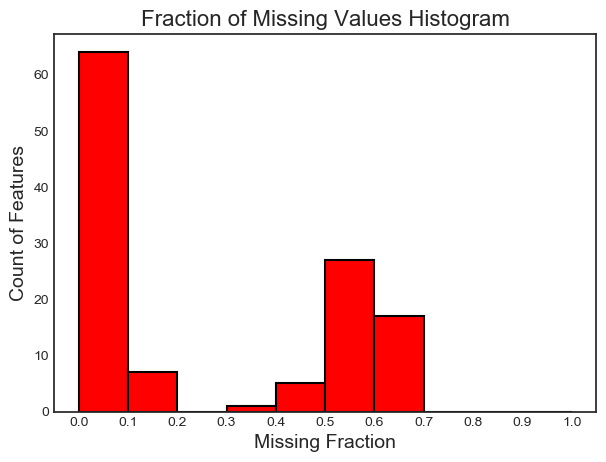

In [23]:
# 绘制缺失值分布图
fs.plot_missing()

### 2、共线特征  
共线特征是彼此高度相关的特征。 在机器学习中，由于高方差和较低的模型可解释性，共线特征会导致测试集上的泛化性能降低。  


In [24]:
# identify_collinear() 函数，基于指定的相关系数值找到共线特征，对于每对相关特征，会删除其中一个.
fs.identify_collinear(correlation_threshold=0.98)

21 features with a correlation magnitude greater than 0.98.



In [25]:
# record_collinear 属性，查看所有共线特征值
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,AMT_GOODS_PRICE,AMT_CREDIT,0.987232
1,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999533
2,YEARS_BUILD_MODE,YEARS_BUILD_AVG,0.992120
3,COMMONAREA_MODE,COMMONAREA_AVG,0.988074
4,FLOORSMAX_MODE,FLOORSMAX_AVG,0.984663


In [26]:
# ops 属性
print(fs.ops)
print()

collinear_features = fs.ops['collinear']
collinear_features

{'missing': ['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE'], 'collinear': ['AMT_GOODS_PRICE', 'FLAG_EMP_PHONE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE']}



['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE']

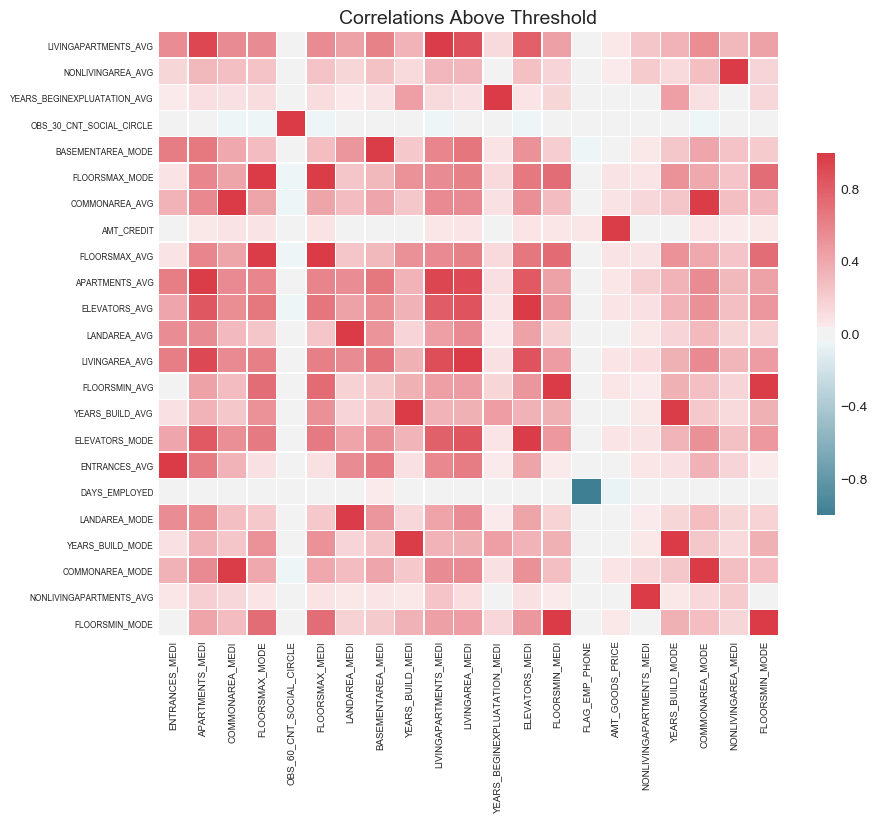

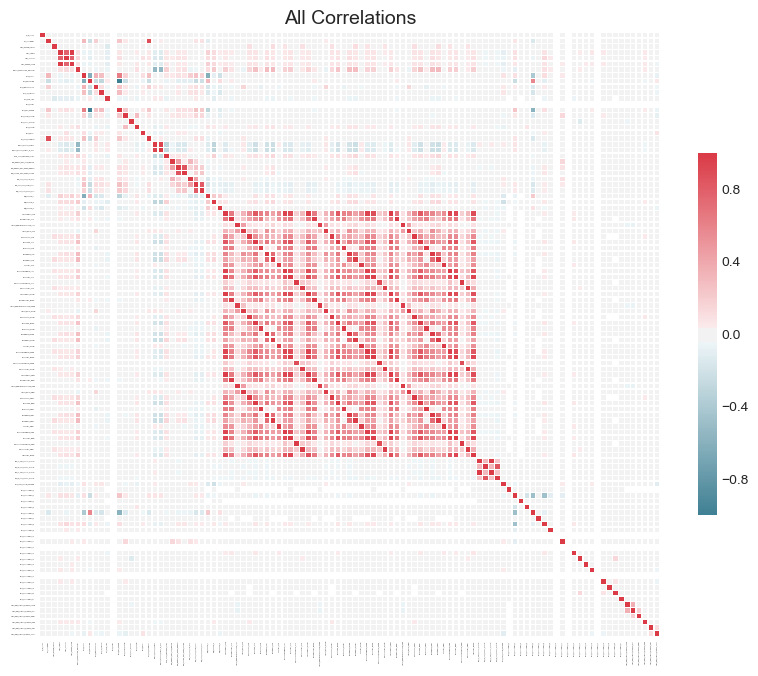

In [27]:
# 可视化
fs.plot_collinear()

fs.plot_collinear(plot_all=True)  # 绘制所有特征之间的相关性值

### 3、零重要特征  
前两种方法可以应用于任何结构化数据集，并且具备确定性 ——对于给定阈值，每次结果都是相同的。 而这种方法仅针对监督式机器学习问题而设计，训练的模型有相应标签，而且是非确定性的。

identify_zero_importance() 函数根据梯度增强机器学习模型（GBM）找到具有零重要性的特征。  

我们可以用例如增强集成之类的基于树的机器学习模型，来找到特征的重要性。 重要性的绝对值没有相对值重要，我们可以用它来确定问题中最为相关的特征，或者删除零重要性特征。 在基于树的模型中，零重要性的特征不会拆分任何节点，因此我们可以在不影响模型性能的情况下删除它们。  

FeatureSelector 使用 [LightGBM](https://github.com/apachecn/lightgbm-doc-zh) 库中的渐变增强模型来寻找特征重要性。 所得出的值取 GBM 训练 10 次后的平均值，以减少差异。 除此之外，模型可以用验证集提前停止（或者选择关闭）以防止过拟合训练数据。  

In [28]:
# identify_zero_importance() 函数，找到零重要性特征 
fs.identify_zero_importance(task='classification',  # task：对应问题分别为“分类（classification）”或“回归（regression）”
                                eval_metric='auc',      # eval_metric：衡量提前停止的指标（如果禁用提前停止就不需要）
                                n_iterations=10,        # n_iterations：为了平均特征重要性所需的训练次数
                                early_stopping=True)   # early_stopping：是否使用提前停止来训练模型

# ops 属性
print(fs.ops.keys())

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[75]	valid_0's auc: 0.740309
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[63]	valid_0's auc: 0.756893
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.740805
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[79]	valid_0's auc: 0.749571
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[48]	valid_0's auc: 0.738584
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[55]	valid_0's auc: 0.746071
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[37]	valid_0's auc: 0.738254
Training until validation scores don't improve for 100 rounds.
Early stopping

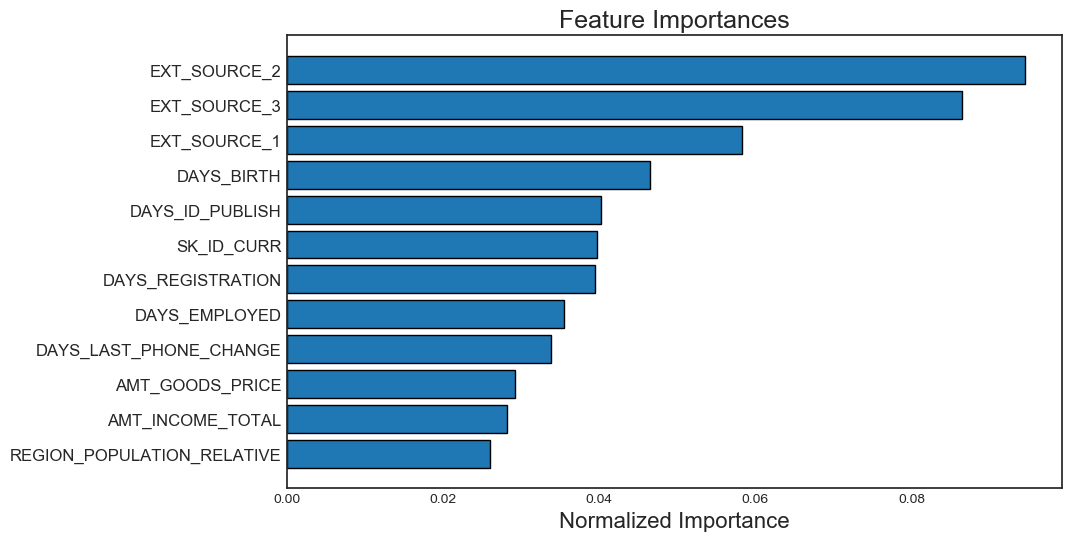

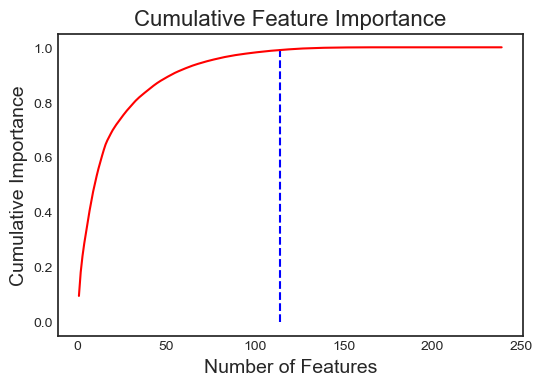

114 features required for 0.99 of cumulative importance


In [29]:
# 绘图
fs.plot_feature_importances(threshold=0.99,   # 累计重要程度，最大为 1
                                plot_n=12)        # plot_n 个最重要特征

# 下面第一幅图列出 plot_n 个最重要特征，第二幅图 x 轴为特征数量，y 轴为累积重要性。垂线为累积重要性的阈值，此图中为99％。

基于重要性的方法有两个注意事项：


•梯度增强的训练是随机的，这意味着每次运行模型时特征重要性都会改变

这应该不会产生重大影响（最重要的特征不会突然变得最少），但它会改变某些特征的顺序。 它还可以影响所识别的零重要性特征的数量。 如果看到特征重要性每次都在变化，不用大惊小怪！


•为了训练机器学习模型，这些特征会首先被独热编码。 这意味着被识别为具有零重要性的一些特征可能是在建模期间被加进来的。


当我们进入特征删除阶段时，可以选择删除任何添加的独热编码特征。 但是如果我们在特征选择后进行机器学习，我们还是得对特征独热编码一遍！

### 4、低重要性特征  
这个方法建立在零重要性函数的基础上，它会利用模型中的特征重要性进行进一步选择。

In [30]:
# identify_low_importance() 函数，找到那些对总重要性没有贡献的低重要性特征，本例中，找出对实现 99％ 总重要性不怎么重要的特征       
fs.identify_low_importance(cumulative_importance=0.99)  # 需要先进行零重要特征检查

113 features required for cumulative importance of 0.99 after one hot encoding.
126 features do not contribute to cumulative importance of 0.99.



基于累积重要性的那张图，梯度增强会认为许多特征与学习过程无关。 和零重要性一样，此方法的结果会在每次训练运行时发生变化。

In [31]:
# feature_importances 属性，查看所有特征重要性
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,EXT_SOURCE_2,155.0,0.094455,0.094455
1,EXT_SOURCE_3,141.9,0.086472,0.180926
2,EXT_SOURCE_1,95.7,0.058318,0.239244
3,DAYS_BIRTH,76.3,0.046496,0.285740
4,DAYS_ID_PUBLISH,66.0,0.040219,0.325960
5,SK_ID_CURR,65.2,0.039732,0.365692
6,DAYS_REGISTRATION,64.8,0.039488,0.405180
7,DAYS_EMPLOYED,58.3,0.035527,0.440707
8,DAYS_LAST_PHONE_CHANGE,55.6,0.033882,0.474589
9,AMT_GOODS_PRICE,48.0,0.029250,0.503839


low_importance方法借鉴了一种使用主成分分析（PCA）的方法，其中通常只保留有一定百分比方差的主成分（例如95％）。 保留多少总重要性也是相同思路。


实际上，我们只有在要使用基于树的模型进行预测时才会用基于特征重要性的方法。 因为除了随机性之外，基于重要性的方法也是一种黑盒方法，我们并不实际知道为什么模型认为这些特征是无关紧要的。 如果真要用这些方法，请多次运行它们以查看结果变化如何，并且尽可能创建具有不同参数的多个数据集来进行测试！

### 5、单一值特征  
最后一种方法更为基本：查找只有单一值的列。 只有单一值的特征对于机器学习无效，因为此特征的方差为零。 例如，基于树的模型永远不能在只有一个值的特征上进行拆分（因为这样就没有组可以分了）。

In [32]:
# identify_single_unique() 函数，找出单一值特征
fs.identify_single_unique()  # 这个函数没有参数

4 features with a single unique value.



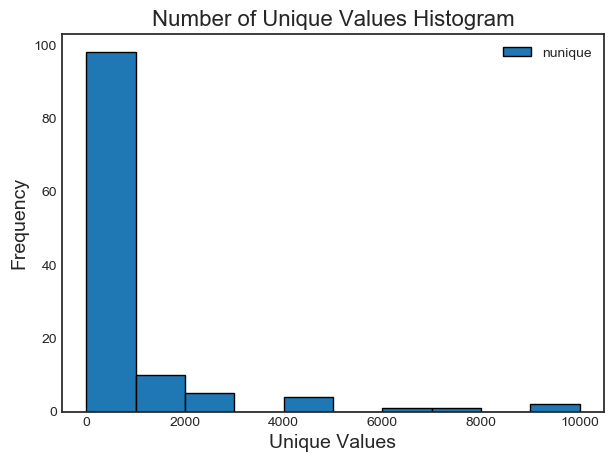

In [33]:
# 可视化
fs.plot_unique()

## 删除特征  
一旦确定要删除的特征，我们有两个办法来删掉它们。  
1、由于要删除的所有特征都存储在FeatureSelector 的 ops dict 中，我们可以使用这个列表手动删除。  
2、另一种选择是使用内置的 remove() 函数。 

如果你想试试用所有手段删除后的效果，需要将参数设置为 methods = ‘all’。

In [34]:
# ops
print(fs.ops.keys())
print()

# removed() 函数，删除特征
train_removed = fs.remove(methods='all',        # 删除特征的方法，'all'、列表、具体方法。['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance']
                          keep_one_hot=False)  # 是否保留机器学习期间创建的独热编码特征

#查看数据
train_removed.head()

dict_keys(['missing', 'collinear', 'zero_importance', 'low_importance', 'single_unique'])

['missing', 'collinear', 'zero_importance', 'low_importance', 'single_unique'] methods have been run

Removed 190 features including one-hot features.


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,247408,Cash loans,F,Y,N,2,108000.0,172512.0,13477.5,Unaccompanied,...,1.0,1.0,1.0,-2622.0,1,0,0.0,0.0,0.0,1.0
1,153916,Revolving loans,F,Y,Y,2,135000.0,180000.0,9000.0,Unaccompanied,...,0.0,0.0,0.0,-520.0,0,0,0.0,0.0,0.0,0.0
2,229065,Cash loans,F,N,Y,0,112500.0,463500.0,20547.0,Family,...,2.0,0.0,0.0,-1285.0,1,0,1.0,0.0,0.0,7.0
3,282013,Cash loans,F,N,Y,0,135000.0,549882.0,17739.0,Unaccompanied,...,5.0,1.0,0.0,-177.0,0,0,0.0,0.0,0.0,1.0
4,142266,Cash loans,F,N,Y,0,90000.0,518562.0,20695.5,Unaccompanied,...,0.0,0.0,0.0,-718.0,1,0,0.0,0.0,1.0,1.0


## 运行所有方法  
与其单独使用这些方法，我们可以将所有方法与 identify_all() 函数共同使用。 这就得为每个方法设置参数。

missing_threshold：缺失值阈值  
correlation_threshold：共线特征阈值  
task：任务，分类（classification）、回归（regression）  
eval_metric：衡量提前停止的指标  
cumulative_importance：累计重要性  


In [36]:
# 创建实例
fs_all = FeatureSelector(data=train_data, labels=train_label)

# identify_all() 函数，运行所有方法
fs_all.identify_all(selection_params={'missing_threshold':0.6, 
                                      'correlation_threshold':0.98, 
                                      'task':'classification', 
                                      'eval_metric':'auc', 
                                      'cumulative_importance':0.99})

# 删除特征
train_data_removed_all = fs_all.remove(methods='all')

# 查看数据
train_data_removed_all.head()

17 features with greater than 0.60 missing values.

4 features with a single unique value.

21 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[52]	valid_0's auc: 0.769669
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[182]	valid_0's auc: 0.725884
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[31]	valid_0's auc: 0.755986
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[135]	valid_0's auc: 0.757619
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[122]	valid_0's auc: 0.717809
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[9]	valid_0's auc: 0.775929
Training until validation scores don't improve fo

,NAME_CONTRACT_TYPE_Cash loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_REALTY_N,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,1,0,1,0,0,1,0,0,1,...,1.0,1.0,1.0,-2622.0,1,0,0.0,0.0,0.0,1.0
1,0,1,0,0,0,0,1,0,0,1,...,0.0,0.0,0.0,-520.0,0,0,0.0,0.0,0.0,0.0
2,1,1,0,0,1,0,0,0,0,0,...,2.0,0.0,0.0,-1285.0,1,0,1.0,0.0,0.0,7.0
3,1,1,0,0,0,0,1,0,0,0,...,5.0,1.0,0.0,-177.0,0,0,0.0,0.0,0.0,1.0
4,1,1,0,0,0,0,1,0,0,1,...,0.0,0.0,0.0,-718.0,1,0,0.0,0.0,1.0,1.0
